In [2]:
import pandas as pd

In [33]:
df = pd.read_csv(r'C:\Users\hasib\OneDrive\Desktop\ML Projct\merged_df.xls')
df.head()

,Year,Month,Day,T,TM,Tm,H,PP,VV,V,VM,RA,TS,FG,pm10,no2,so2,co
0,2016,1,2,20.8,28.3,12.9,45,0.0,6.3,1.1,5.4,0,0,0,79.0,60.0,9.0,15.0
1,2016,1,3,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,79.0,45.0,10.0,13.0
2,2016,1,4,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,72.0,45.0,11.0,13.0
3,2016,1,5,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,76.0,42.0,14.0,11.0
4,2016,1,6,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,65.0,25.0,26.0,6.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    2418 non-null   int64  
 1   Month   2418 non-null   int64  
 2   Day     2418 non-null   int64  
 3   T       2418 non-null   float64
 4   TM      2418 non-null   float64
 5   Tm      2418 non-null   float64
 6   H       2418 non-null   int64  
 7   PP      2418 non-null   float64
 8   VV      2418 non-null   float64
 9   V       2418 non-null   float64
 10  VM      2418 non-null   float64
 11  RA      2418 non-null   int64  
 12  TS      2418 non-null   int64  
 13  FG      2418 non-null   int64  
 14   pm10   2418 non-null   float64
 15   no2    2418 non-null   float64
 16   so2    2418 non-null   float64
 17   co     2418 non-null   float64
dtypes: float64(11), int64(7)
memory usage: 340.2 KB


In [38]:


# Note: There's a leading space in the column name " pm10" in your data,
# so we must use " pm10" exactly or rename it first.
pm10_column = " pm10"

# Define PM10 breakpoints (U.S. EPA)
pm10_breakpoints = [
    (0.0,   54.0,   0,   50),
    (55.0,  154.0,  51,  100),
    (155.0, 254.0,  101, 150),
    (255.0, 354.0,  151, 200),
    (355.0, 424.0,  201, 300),
    (425.0, 504.0,  301, 400),
    (505.0, 604.0,  401, 500)
]

def calculate_aqi_pm10(concentration):
    """
    Calculate the AQI for a given PM10 concentration using the 
    US EPA PM10 breakpoints and standard formula:
    
      AQI = ((I_high - I_low) / (C_high - C_low)) * (C - C_low) + I_low
    """
    # Handle values beyond the highest bracket:
    if concentration >= 605:
        return 500  # Capped at the top of the official AQI scale
    
    for (c_low, c_high, i_low, i_high) in pm10_breakpoints:
        if c_low <= concentration <= c_high:
            # Linear interpolation
            aqi = ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
            return round(aqi)  # Round to nearest integer
    
    # If it's below 0 or some unexpected scenario, just return None
    return None

# Apply the function to the PM10 column
df["AQI_PM10"] = df[pm10_column].apply(calculate_aqi_pm10)

# Show first few rows to verify
print(df.head(10))

# If you want to save the result back to a CSV, do:
# df.to_csv('/mnt/data/merged_df_with_aqi.csv', index=False)


   Year  Month  Day     T    TM    Tm   H   PP   VV    V   VM  RA  TS  FG  \
0  2016      1    2  20.8  28.3  12.9  45  0.0  6.3  1.1  5.4   0   0   0   
1  2016      1    3  21.4  29.0  13.7  45  0.0  6.3  0.4  3.5   0   0   0   
2  2016      1    4  21.4  29.0  13.7  45  0.0  6.3  0.4  3.5   0   0   0   
3  2016      1    5  21.4  29.0  13.7  45  0.0  6.3  0.4  3.5   0   0   0   
4  2016      1    6  21.4  29.0  13.7  45  0.0  6.3  0.4  3.5   0   0   0   
5  2016      1    7  21.0  28.7  17.0  65  0.0  6.3  3.1  5.4   0   0   0   
6  2016      1    8  20.4  27.6  16.2  61  0.0  5.5  1.3  5.4   0   0   0   
7  2016      1    9  20.7  28.4  15.1  47  0.0  6.3  0.9  3.5   0   0   0   
8  2016      1   10  20.7  28.4  15.1  47  0.0  6.3  0.9  3.5   0   0   0   
9  2016      1   11  20.7  28.4  15.1  47  0.0  6.3  0.9  3.5   0   0   0   

    pm10   no2   so2    co  AQI_PM10  
0   79.0  60.0   9.0  15.0        63  
1   79.0  45.0  10.0  13.0        63  
2   72.0  45.0  11.0  13.0        5

In [40]:
df.head()

,Year,Month,Day,T,TM,Tm,H,PP,VV,V,VM,RA,TS,FG,pm10,no2,so2,co,AQI_PM10
0,2016,1,2,20.8,28.3,12.9,45,0.0,6.3,1.1,5.4,0,0,0,79.0,60.0,9.0,15.0,63
1,2016,1,3,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,79.0,45.0,10.0,13.0,63
2,2016,1,4,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,72.0,45.0,11.0,13.0,59
3,2016,1,5,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,76.0,42.0,14.0,11.0,61
4,2016,1,6,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,65.0,25.0,26.0,6.0,56


In [45]:
import requests
import json

API_TOKEN = "e957378050e921377992405d2c4255ce56922963"
STATION_ID = 8686  # City Railway Station, Bangalore
URL = f"https://api.waqi.info/feed/@{STATION_ID}/?token={API_TOKEN}"

# Fetch data
response = requests.get(URL)
data = response.json()

if "data" in data:
    # Extracting general information
    city = data['data']['city']['name']
    aqi = data['data']['aqi']
    dominant_pollutant = data['data']['dominentpol']
    
    # Extracting pollutant levels (handling missing values)
    pollutants = data['data'].get('iaqi', {})
    co = pollutants.get('co', {}).get('v', 'N/A')
    no2 = pollutants.get('no2', {}).get('v', 'N/A')
    pm10 = pollutants.get('pm10', {}).get('v', 'N/A')
    so2 = pollutants.get('so2', {}).get('v', 'N/A')
    temperature = pollutants.get('t', {}).get('v', 'N/A')
    wind_speed = pollutants.get('w', {}).get('v', 'N/A')
    
    # Extracting forecast data
    forecast = data['data']['forecast']['daily']
    pm10_forecast = forecast.get('pm10', [])
    pm25_forecast = forecast.get('pm25', [])
    o3_forecast = forecast.get('o3', [])
    uvi_forecast = forecast.get('uvi', [])

    # Display the extracted data
    print(f"City: {city}")
    print(f"Current AQI: {aqi}")
    print(f"Dominant Pollutant: {dominant_pollutant}")
    print("\n--- Pollutant Levels ---")
    print(f"CO: {co} µg/m³")
    print(f"NO2: {no2} µg/m³")
    print(f"PM10: {pm10} µg/m³")
    print(f"SO2: {so2} µg/m³")
    print(f"Temperature: {temperature}°C")
    print(f"Wind Speed: {wind_speed} km/h")

    print("\n--- Forecast Data ---")
    print("PM10 Forecast:", pm10_forecast)
    print("PM2.5 Forecast:", pm25_forecast)
    print("O3 Forecast:", o3_forecast)
    print("UVI Forecast:", uvi_forecast)
else:
    print("Failed to retrieve data. Check API key or request format.")

City: City Railway Station, Bangalore, India
Current AQI: 69
Dominant Pollutant: pm10

--- Pollutant Levels ---
CO: 14.8 µg/m³
NO2: 12 µg/m³
PM10: 69 µg/m³
SO2: 5.5 µg/m³
Temperature: -20.1°C
Wind Speed: 41.4 km/h

--- Forecast Data ---
PM10 Forecast: [{'avg': 19, 'day': '2025-03-20', 'max': 19, 'min': 19}, {'avg': 28, 'day': '2025-03-21', 'max': 30, 'min': 22}, {'avg': 38, 'day': '2025-03-22', 'max': 46, 'min': 28}, {'avg': 33, 'day': '2025-03-23', 'max': 46, 'min': 28}, {'avg': 40, 'day': '2025-03-24', 'max': 46, 'min': 28}, {'avg': 45, 'day': '2025-03-25', 'max': 46, 'min': 34}, {'avg': 46, 'day': '2025-03-26', 'max': 46, 'min': 46}, {'avg': 45, 'day': '2025-03-27', 'max': 46, 'min': 28}, {'avg': 45, 'day': '2025-03-28', 'max': 46, 'min': 33}]
PM2.5 Forecast: [{'avg': 60, 'day': '2025-03-20', 'max': 68, 'min': 52}, {'avg': 87, 'day': '2025-03-21', 'max': 89, 'min': 70}, {'avg': 113, 'day': '2025-03-22', 'max': 138, 'min': 89}, {'avg': 101, 'day': '2025-03-23', 'max': 135, 'min': 89}

In [47]:
pm10_col = " pm10" 

In [49]:
import numpy as np
def generate_correlated_traffic(pm10_value):
    base_traffic = 2000
    slope = 10
    noise = np.random.normal(loc=0, scale=50)  # Adjust noise as desired
    raw_value = base_traffic + slope * pm10_value + noise
    return max(0, raw_value)  # ensure no negative values

df["Traffic"] = df[pm10_col].apply(generate_correlated_traffic).astype(int)

# Inspect the first few rows
print(df[[pm10_col, "Traffic"]].head(10))

    pm10  Traffic
0   79.0     2735
1   79.0     2698
2   72.0     2728
3   76.0     2787
4   65.0     2659
5   57.0     2584
6   52.0     2451
7   54.0     2528
8   51.0     2523
9   43.0     2393


In [50]:
df.head()

,Year,Month,Day,T,TM,Tm,H,PP,VV,V,VM,RA,TS,FG,pm10,no2,so2,co,AQI_PM10,Traffic
0,2016,1,2,20.8,28.3,12.9,45,0.0,6.3,1.1,5.4,0,0,0,79.0,60.0,9.0,15.0,63,2735
1,2016,1,3,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,79.0,45.0,10.0,13.0,63,2698
2,2016,1,4,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,72.0,45.0,11.0,13.0,59,2728
3,2016,1,5,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,76.0,42.0,14.0,11.0,61,2787
4,2016,1,6,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,65.0,25.0,26.0,6.0,56,2659


In [53]:
drop_cols = ["Year", "Month", "Day", "AQI_PM10"]
X = df.drop(columns=drop_cols)

# 3) Our target is the 'AQI_PM10' column
y = df["AQI_PM10"]

# 4) Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Scale/normalize the data (very common for neural networks)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature columns being used:", X.columns.tolist())
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

Feature columns being used: ['T', 'TM', 'Tm', 'H', 'PP', 'VV', 'V', 'VM', 'RA', 'TS', 'FG', ' pm10', ' no2', ' so2', ' co', 'Traffic']
X_train_scaled shape: (1934, 16)
y_train shape: (1934,)


In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1) Define a simple MLP model
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # input layer
    layers.Dense(64, activation='relu'),            # hidden layer 1
    layers.Dense(64, activation='relu'),            # hidden layer 2
    layers.Dense(1)                                 # output layer (1 neuron for regression)
])

# 2) Compile the model
#    Use mean squared error (MSE) as the loss, and mean absolute error (MAE) as an additional metric
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# 3) Train (fit) the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 20% of the training set for validation
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3741.2712 - mae: 55.4386 - val_loss: 2661.0874 - val_mae: 49.5366
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3183.7383 - mae: 47.8881 - val_loss: 1148.9199 - val_mae: 31.0866
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 922.8630 - mae: 26.0404 - val_loss: 309.3192 - val_mae: 14.2666
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 284.2884 - mae: 12.5364 - val_loss: 198.6290 - val_mae: 11.0731
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172.5428 - mae: 10.2702 - val_loss: 150.4286 - val_mae: 9.7265
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191.7148 - mae: 9.7079 - val_loss: 121.8843 - val_mae: 8.5518
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.9366 - mae: 8.2073 - val_loss: 102.8365 - val_mae: 7.8164
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.9927 - mae: 7.5819 - val_loss: 88.5853 - val_mae: 7.1963
Epoch 9/50
49/49 ━━━━━━━━━━━━

In [55]:
# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# You can also make predictions
y_pred = model.predict(X_test_scaled)


Test MSE: 8.1011
Test MAE: 1.6472
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


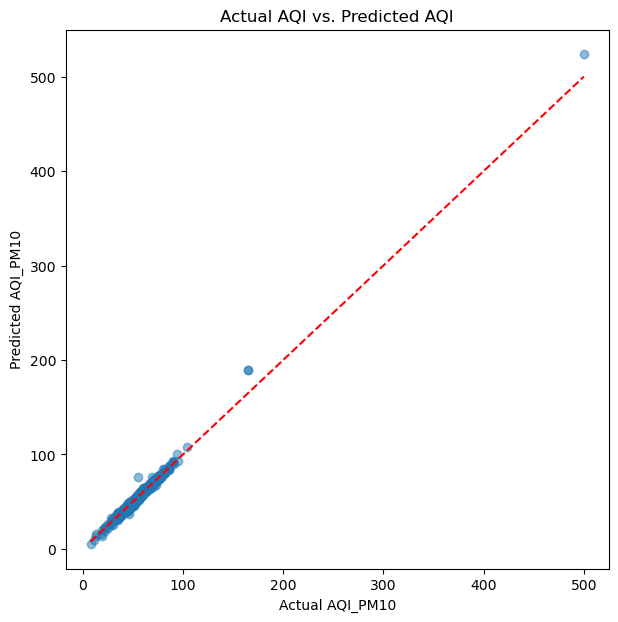

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual AQI vs. Predicted AQI")
plt.xlabel("Actual AQI_PM10")
plt.ylabel("Predicted AQI_PM10")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()
